# CSCI 532 Semester Project

James Avery

## Problem #3

>Write a C/C++/Matlab/Java program to compute insertion sort and merge sort. (You can use the code from the textbooks by Deitel and Deitel or from the web.) Obtain the run time of both routines.

>The input data should be an int array containing random element values (between, say, 0 and 1023). Obtain run time T with 1D (input) array of size of $n = 16$, $256$, $4096$, $65536$, $1048576$ (i.e. $2^p$, where $p = 4$, $8$, $12$, $16$, $20$). The run time for each $n$ should be averaged with about $\left\lfloor{\frac{512}{p \times p}}\right\rfloor$ runs. Each run for a given $n$ should use a different random input.

>Plot (with Excel, Matlab, or other available tools) the run time for both routines on one plot, with the $x$ axis in $p$ values, and $y$ axis in $\log{T}$. Label on the plot which curve is for insertion sort and which is for merge sort.

>Submit C/C++ programs and plot, with instructions in readme.txt on how to build and run the program. (Include the Dev-C++/MS Visual Studio/Java NetBeans project file.)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from IPython.display import Markdown

## Step 1: Run the program

In [2]:
#Run the program
print("Starting run at {}.\n".format(str(datetime.datetime.now())))

%time !./project equal-batches

print("\nFinished run at {}.\n".format(str(datetime.datetime.now())))

Starting run at 2018-04-04 13:47:09.950141.


 Insertion Sort

16:
318 303 278 377 292 238 194 274 268 238 325 213 360 236 353 218 239 252 265 225 253 270 394 345 

256:
15364 28603 14837 21803 27716 27317 23362 21070 21229 28977 28759 25239 27213 33152 31420 32809 35123 31103 23706 20790 29756 29159 29348 26023 

4096:
3584851 6134122 6421733 6782980 6830984 6845526 6864116 3423482 6955506 3552037 7007811 6776468 6791258 6990037 6927552 3429192 5430586 15701308 4196017 16877389 16851765 13183650 6724825 13079781 

65536:
986373828 981658404 983086878 984772005 937238141 935620765 939440581 943176065 941583759 887930931 891532211 885840306 890021767 883592807 893097911 1068492950 1062601590 1060513300 1058352381 1066911410 1064762349 870868305 884651278 889676376 

1048576:
223965176062 227974006359 241962000185 241934664421 247721082940 247695445205 296776172219 296749331559 296801156989 363096196419 363069029481 363042769114 363015899034 428545418312 428494241408 428597745256 4285193

Just to be safe, list the contents of the directory to make sure the data files exist.

In [3]:
!ls *.csv

insertionsort.csv  mergesort.csv


## Step 2: Prepare the data for processing

Load the run-times into numpy arrays for processing.

**Note that this will only work if the program was run with the `equal-batches` flag set.** Numpy requires that each row have the same number of columns.

In [4]:
insertion = np.loadtxt(
    './insertionsort.csv', dtype='int64', delimiter=',')
merge = np.loadtxt(
    './mergesort.csv', dtype='int64', delimiter=',')

The data is stored in rows of the format $n, r_1, r_2, \ldots r_i$, where $n$ is the size of the array, and $r_i$ is the run-time in nanoseconds of the $i^{\textrm{th}}$ run, so a little data muging is necessary. The first column becomes the labels, and the subsequent columns are retained as data.

In [5]:
insertion_labels = insertion[:, 0]
insertion = insertion[:, 1:]
merge_labels = merge[:, 0]
merge = merge[:, 1:]

The `*_labels` arrays *should* contain exactly the same data. If they don't, something has gone wrong. If they do, then it's safe to remove one of them and just use the other for all labels.

In [6]:
if not np.all(insertion_labels == merge_labels):
    raise ValueError(
        "The two data sets were not tested on arrays of the same sizes." +
            "\n\tInsertion Sort was tested with arrays of sizes:\n\t\t" +
            str(insertion_labels) +
            "\n\tMerge Sort was tested with arrays of sizes:\n\t\t" +
            str(merge_labels))
else:
    labels = insertion_labels.copy()
    del merge_labels, insertion_labels

Find the means of each run-time

In [7]:
insertion_mean, merge_mean = insertion.mean(axis=1), merge.mean(axis=1)

## Step 3: Graph results

| $n$ | Insertion Sort | Merge Sort |
|:---|:---:|:---:|
| 16 | 265.75 | 3152.4 |
| 256 | 2.717e+04 | 4.264e+04 |
| 4096 | 8.5647e+06 | 7.5054e+05 |
| 65536 | 9.5492e+08 | 1.3937e+07 |
| 1048576 | 3.4309e+11 | 2.0701e+08 |


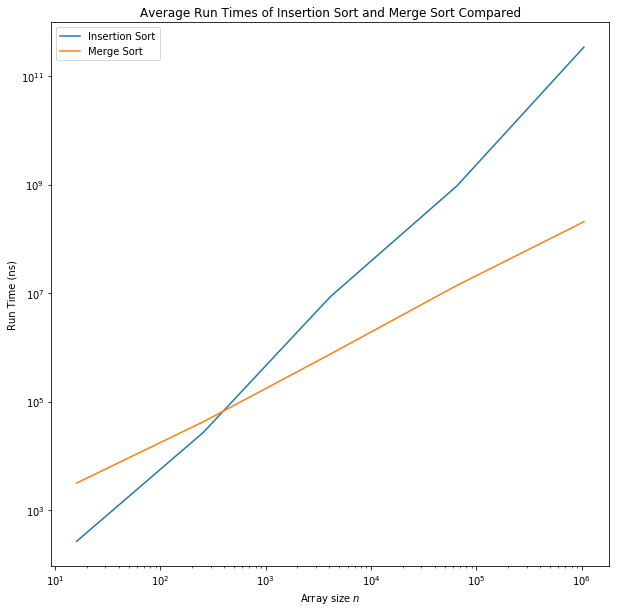

In [43]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.plot(labels, insertion_mean, label='Insertion Sort')
plt.plot(labels, merge_mean, label='Merge Sort')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Array size $n$")
plt.ylabel('Run Time (ns)')
plt.title("Average Run Times of Insertion Sort and Merge Sort Compared")

table = "| $n$ | Insertion Sort | Merge Sort |\n|:---|:---:|:---:|\n"
for i in range(len(labels)):
    table += "| {n} | {ins:.5} | {ms:.5} |\n".format(
        n=labels[i], 
        ins=insertion_mean[i], 
        ms=merge_mean[i]
    )
Markdown(table)